分类中解决类别不平衡问题——类别不平衡数据集基本介绍

    前面我们已经初步认识了，什么是类别不平衡问题。其实，在现实环境中，采集的数据（建模样
    本）往往是比例失衡的。比如网贷数据，逾期人数的比例是极低的（千分之几的比例）；奢侈品
    消费人群鉴定等等。

类别不平衡数据集基本介绍

    我们一起看一下，当遇到数据类别不平衡的时候，我们该如何处理。
    在Python中有lmblearn包，它就是为处理数据比例失衡而生的。

    （1）安装lmblearn包：pip install imbalanced-learn
[第三方包链接](https://pypi.org/project/imbalanced-learn/)

In [4]:
# （2）创造数据集
from sklearn.datasets import  make_classification
import matplotlib.pyplot as plt

# 使用make_classification生成样本数据（类别不平衡）
x, y= make_classification(
    n_samples=5000,     # 生成的样本点个数
    n_features=2,     # 特征个数=n_informative{}+n_redundant+n_repeated
    n_informative=2,    # 多信息特征个数
    n_redundant=0,      # 冗余信息，informative特征的随机线性组合
    n_repeated=0,       # 重复信息，随即提取n_informative和n_redundant特征
    n_classes=3,        # 分类类别
    n_clusters_per_class=1,     # 第一个类别是由几个cluster构成的，即一个类别是由几个组构成
    weights=[0.01, 0.05, 0.94],     # 列表类型，权重比
    random_state=0
)

In [7]:
x

array([[ 8.62420206e-01, -9.63476905e-01],
       [-1.38080465e-03, -2.66979396e+00],
       [ 1.40804486e+00, -5.32895046e-01],
       ...,
       [ 1.09447133e+00, -6.99569620e-01],
       [ 1.60312887e+00, -8.26180435e-01],
       [ 1.99589648e+00,  5.42836944e-01]])

In [9]:
x.shape

(5000, 2)

In [10]:
y

array([2, 2, 2, ..., 2, 2, 2])

In [11]:
y.shape

(5000,)

In [5]:
# 查看各个标签的样本量
from collections import Counter
Counter(y)

Counter({np.int64(2): 4674, np.int64(1): 262, np.int64(0): 64})

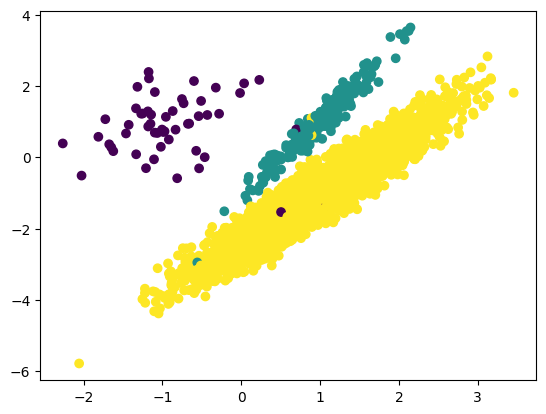

In [6]:
# 数据集可视化
# x[:, 0]  所有行第0列特征
# x[:, 1]  所有行第1列特征
# c=y 表示基于y这个类别进行分类
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

    我们可以看出样本的三个标签中，1，2的样本量极少，样本失衡。
    下面使用imblearn进行采样，基于以上数据，进行相应的数据处理。

    关于类别不平衡的问题，主要有两种处理方法：
        （1）过采样：减少数量较多的一类样本的数量，使得正负样本比例均衡
        （2）欠采样：增加数量较少的一类样本的数量，使得正负样本比例均衡